In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import load_breast_cancer
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.metrics import confusion_matrix 

In [ ]:
# 경고 메세지 숨기기 
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

In [ ]:
1. breast_cancer 데이터셋을 이용하여 딥러닝으로 처리하시요 (sklearn, 케라스버전)
1) train, test 분리
2) test 1번째 행 암 여부 예측
3) train, test 정확도 구하기

2. fashion_mnist 데이터셋을 이용하여 딥러닝으로 처리하시요 (sklearn, 케라스버전)
1) test 1번째 이미지 예측
2) train, test, 정확도 구하기
3) confusion matrix
0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot

In [4]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

# 퀴즈1
breast_cancer 데이터셋을 이용하여 딥러닝으로 처리하시요 (sklearn, 케라스버전)
1) train, test 분리 <br>
2) test 1번째 행 암 여부 예측 <br>
3) train, test 정확도 구하기

## train, test 분리

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
cancer_df.shape

(569, 30)

In [8]:
cancer_df['target']=cancer.target
cancer_df[cancer_df['target']==0].shape

(212, 31)

In [9]:
cancer_df[cancer_df['target']==1].shape

(357, 31)

In [10]:
x_data = cancer_df.iloc[:,:-1].values
y_data = cancer_df.iloc[:,[-1]].values

In [11]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_dataN = scaler.fit_transform(x_data)
x_dataN.shape

(569, 30)

In [12]:
# train, test 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x_dataN, y_data, test_size=0.3, stratify=y_data)
print(x_train.shape)
print(x_test.shape)

(398, 30)
(171, 30)


## sklearn 버전

In [13]:
model_mlp = MLPClassifier( hidden_layer_sizes=(100,), max_iter=1000, verbose=True)
model_mlp.fit( x_train, y_train)

C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 0.67831877
Iteration 2, loss = 0.66847748
Iteration 3, loss = 0.65854288
Iteration 4, loss = 0.64852126
Iteration 5, loss = 0.63884196
Iteration 6, loss = 0.62913124
Iteration 7, loss = 0.61928609
Iteration 8, loss = 0.60974948
Iteration 9, loss = 0.59986997
Iteration 10, loss = 0.59014730
Iteration 11, loss = 0.58057579
Iteration 12, loss = 0.57109218
Iteration 13, loss = 0.56146550
Iteration 14, loss = 0.55215744
Iteration 15, loss = 0.54288207
Iteration 16, loss = 0.53341742
Iteration 17, loss = 0.52381236
Iteration 18, loss = 0.51440199
Iteration 19, loss = 0.50499187
Iteration 20, loss = 0.49555985
Iteration 21, loss = 0.48602850
Iteration 22, loss = 0.47625614
Iteration 23, loss = 0.46683522
Iteration 24, loss = 0.45737154
Iteration 25, loss = 0.44806850
Iteration 26, loss = 0.43886555
Iteration 27, loss = 0.43008165
Iteration 28, loss = 0.42161837
Iteration 29, loss = 0.41320153
Iteration 30, loss = 0.40535807
Iteration 31, loss = 0.39726042
Iteration 32, los

Iteration 271, loss = 0.06167487
Iteration 272, loss = 0.06149293
Iteration 273, loss = 0.06140161
Iteration 274, loss = 0.06109386
Iteration 275, loss = 0.06091040
Iteration 276, loss = 0.06075274
Iteration 277, loss = 0.06071391
Iteration 278, loss = 0.06040086
Iteration 279, loss = 0.06015949
Iteration 280, loss = 0.06007479
Iteration 281, loss = 0.05983558
Iteration 282, loss = 0.05973724
Iteration 283, loss = 0.05943052
Iteration 284, loss = 0.05925508
Iteration 285, loss = 0.05912673
Iteration 286, loss = 0.05889519
Iteration 287, loss = 0.05882571
Iteration 288, loss = 0.05866959
Iteration 289, loss = 0.05841616
Iteration 290, loss = 0.05821985
Iteration 291, loss = 0.05820396
Iteration 292, loss = 0.05792173
Iteration 293, loss = 0.05774788
Iteration 294, loss = 0.05757848
Iteration 295, loss = 0.05741515
Iteration 296, loss = 0.05734482
Iteration 297, loss = 0.05716198
Iteration 298, loss = 0.05709886
Iteration 299, loss = 0.05677447
Iteration 300, loss = 0.05660702
Iteration 

MLPClassifier(max_iter=1000, verbose=True)

### test 1번째 행 암 여부 예측

In [16]:
model_mlp.predict( x_test[0].reshape(1,-1) )

array([0])

In [17]:
y_test[0]

array([0])

### train, test 정확도 구하기

In [18]:
(model_mlp.predict( x_train) == y_train ).mean()

0.5341279260624732

In [19]:
x_train.shape

(398, 30)

## keras 버전

In [20]:
model = Sequential()
model.add( Dense( units=64, input_dim=30, activation='relu' ))
model.add( Dense( units=32, input_dim=64, activation='relu' ))
model.add( Dense( units=2, input_dim=32, activation='sigmoid' ))

model.compile( loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])  
model.fit( x_train, y_train, epochs=1000 )

Epoch 1/1000
13/13 [==============================] - 0s 997us/step - loss: 0.6464 - acc: 0.7714
Epoch 2/1000
13/13 [==============================] - 0s 665us/step - loss: 0.5786 - acc: 0.8492
Epoch 3/1000
13/13 [==============================] - 0s 830us/step - loss: 0.5038 - acc: 0.8844
Epoch 4/1000
13/13 [==============================] - 0s 914us/step - loss: 0.4258 - acc: 0.8819
Epoch 5/1000
13/13 [==============================] - 0s 831us/step - loss: 0.3591 - acc: 0.8920
Epoch 6/1000
13/13 [==============================] - 0s 747us/step - loss: 0.2957 - acc: 0.9070
Epoch 7/1000
13/13 [==============================] - 0s 748us/step - loss: 0.2524 - acc: 0.9171
Epoch 8/1000
13/13 [==============================] - 0s 748us/step - loss: 0.2282 - acc: 0.9196
Epoch 9/1000
13/13 [==============================] - 0s 748us/step - loss: 0.2012 - acc: 0.9171
Epoch 10/1000
13/13 [==============================] - 0s 748us/step - loss: 0.1767 - acc: 0.9322
Epoch 11/1000
13/13 [========

13/13 [==============================] - 0s 748us/step - loss: 0.0108 - acc: 0.9975
Epoch 168/1000
13/13 [==============================] - 0s 748us/step - loss: 0.0111 - acc: 0.9975
Epoch 169/1000
13/13 [==============================] - 0s 831us/step - loss: 0.0104 - acc: 0.9975
Epoch 170/1000
13/13 [==============================] - 0s 748us/step - loss: 0.0105 - acc: 1.0000
Epoch 171/1000
13/13 [==============================] - 0s 831us/step - loss: 0.0098 - acc: 1.0000
Epoch 172/1000
13/13 [==============================] - 0s 831us/step - loss: 0.0103 - acc: 1.0000
Epoch 173/1000
13/13 [==============================] - 0s 831us/step - loss: 0.0153 - acc: 0.9925
Epoch 174/1000
13/13 [==============================] - 0s 831us/step - loss: 0.0129 - acc: 0.9975
Epoch 175/1000
13/13 [==============================] - 0s 831us/step - loss: 0.0427 - acc: 0.9749
Epoch 176/1000
13/13 [==============================] - 0s 997us/step - loss: 0.0203 - acc: 0.9899
Epoch 177/1000
13/13 [===

13/13 [==============================] - 0s 831us/step - loss: 0.0019 - acc: 1.0000
Epoch 332/1000
13/13 [==============================] - 0s 665us/step - loss: 0.0018 - acc: 1.0000
Epoch 333/1000
13/13 [==============================] - 0s 748us/step - loss: 0.0016 - acc: 1.0000
Epoch 334/1000
13/13 [==============================] - 0s 831us/step - loss: 0.0017 - acc: 1.0000
Epoch 335/1000
13/13 [==============================] - 0s 832us/step - loss: 0.0022 - acc: 1.0000
Epoch 336/1000
13/13 [==============================] - 0s 748us/step - loss: 0.0024 - acc: 1.0000
Epoch 337/1000
13/13 [==============================] - 0s 914us/step - loss: 0.0019 - acc: 1.0000
Epoch 338/1000
13/13 [==============================] - 0s 831us/step - loss: 0.0017 - acc: 1.0000
Epoch 339/1000
13/13 [==============================] - 0s 914us/step - loss: 0.0027 - acc: 1.0000
Epoch 340/1000
13/13 [==============================] - 0s 747us/step - loss: 0.0068 - acc: 0.9975
Epoch 341/1000
13/13 [===

Epoch 493/1000
13/13 [==============================] - 0s 749us/step - loss: 4.8028e-04 - acc: 1.0000
Epoch 494/1000
13/13 [==============================] - 0s 748us/step - loss: 4.8906e-04 - acc: 1.0000
Epoch 495/1000
13/13 [==============================] - 0s 749us/step - loss: 5.0782e-04 - acc: 1.0000
Epoch 496/1000
13/13 [==============================] - 0s 831us/step - loss: 4.5510e-04 - acc: 1.0000
Epoch 497/1000
13/13 [==============================] - 0s 914us/step - loss: 4.8360e-04 - acc: 1.0000
Epoch 498/1000
13/13 [==============================] - 0s 748us/step - loss: 4.8179e-04 - acc: 1.0000
Epoch 499/1000
13/13 [==============================] - 0s 748us/step - loss: 4.4016e-04 - acc: 1.0000
Epoch 500/1000
13/13 [==============================] - 0s 831us/step - loss: 4.5053e-04 - acc: 1.0000
Epoch 501/1000
13/13 [==============================] - 0s 748us/step - loss: 4.3140e-04 - acc: 1.0000
Epoch 502/1000
13/13 [==============================] - 0s 831us/step - l

13/13 [==============================] - 0s 665us/step - loss: 1.2702e-04 - acc: 1.0000
Epoch 652/1000
13/13 [==============================] - 0s 831us/step - loss: 1.2881e-04 - acc: 1.0000
Epoch 653/1000
13/13 [==============================] - 0s 748us/step - loss: 1.2927e-04 - acc: 1.0000
Epoch 654/1000
13/13 [==============================] - 0s 749us/step - loss: 1.3662e-04 - acc: 1.0000
Epoch 655/1000
13/13 [==============================] - 0s 748us/step - loss: 1.2386e-04 - acc: 1.0000
Epoch 656/1000
13/13 [==============================] - 0s 914us/step - loss: 1.8212e-04 - acc: 1.0000
Epoch 657/1000
13/13 [==============================] - 0s 748us/step - loss: 1.8026e-04 - acc: 1.0000
Epoch 658/1000
13/13 [==============================] - 0s 914us/step - loss: 1.5970e-04 - acc: 1.0000
Epoch 659/1000
13/13 [==============================] - 0s 914us/step - loss: 1.3191e-04 - acc: 1.0000
Epoch 660/1000
13/13 [==============================] - 0s 914us/step - loss: 2.0553e-04

13/13 [==============================] - 0s 748us/step - loss: 1.6809e-04 - acc: 1.0000
Epoch 811/1000
13/13 [==============================] - 0s 665us/step - loss: 1.6474e-04 - acc: 1.0000
Epoch 812/1000
13/13 [==============================] - 0s 582us/step - loss: 1.6311e-04 - acc: 1.0000
Epoch 813/1000
13/13 [==============================] - 0s 749us/step - loss: 1.6645e-04 - acc: 1.0000
Epoch 814/1000
13/13 [==============================] - 0s 831us/step - loss: 1.6063e-04 - acc: 1.0000
Epoch 815/1000
13/13 [==============================] - 0s 748us/step - loss: 1.6407e-04 - acc: 1.0000
Epoch 816/1000
13/13 [==============================] - 0s 832us/step - loss: 1.5681e-04 - acc: 1.0000
Epoch 817/1000
13/13 [==============================] - 0s 748us/step - loss: 1.5724e-04 - acc: 1.0000
Epoch 818/1000
13/13 [==============================] - 0s 914us/step - loss: 1.5781e-04 - acc: 1.0000
Epoch 819/1000
13/13 [==============================] - 0s 748us/step - loss: 1.5649e-04

13/13 [==============================] - 0s 831us/step - loss: 6.3663e-05 - acc: 1.0000
Epoch 969/1000
13/13 [==============================] - 0s 748us/step - loss: 6.1860e-05 - acc: 1.0000
Epoch 970/1000
13/13 [==============================] - 0s 748us/step - loss: 6.3795e-05 - acc: 1.0000
Epoch 971/1000
13/13 [==============================] - 0s 832us/step - loss: 6.1997e-05 - acc: 1.0000
Epoch 972/1000
13/13 [==============================] - 0s 748us/step - loss: 6.3740e-05 - acc: 1.0000
Epoch 973/1000
13/13 [==============================] - 0s 748us/step - loss: 6.2611e-05 - acc: 1.0000
Epoch 974/1000
13/13 [==============================] - 0s 748us/step - loss: 6.1247e-05 - acc: 1.0000
Epoch 975/1000
13/13 [==============================] - 0s 748us/step - loss: 6.0315e-05 - acc: 1.0000
Epoch 976/1000
13/13 [==============================] - 0s 915us/step - loss: 6.0786e-05 - acc: 1.0000
Epoch 977/1000
13/13 [==============================] - 0s 831us/step - loss: 6.1398e-05

### test 1번째 행 암 여부 예측

In [21]:
x_test[0].reshape(-1,30)

array([[0.3927777 , 0.42948935, 0.38096883, 0.24055143, 0.34251151,
        0.26323538, 0.12593721, 0.16217694, 0.33686869, 0.27822241,
        0.03400326, 0.02992397, 0.02765867, 0.02377297, 0.05360846,
        0.08785712, 0.04479798, 0.11382838, 0.05400462, 0.05804762,
        0.3511206 , 0.42670576, 0.31570297, 0.19364432, 0.38915671,
        0.29359374, 0.2899361 , 0.42130584, 0.31736645, 0.27994228]])

In [22]:
model.predict( x_test[0].reshape(-1,30) ).argmax(axis=1)

array([0], dtype=int64)

In [23]:
y_test[0]

array([0])

### train, test 정확도 구하기

In [24]:
pred_train = model.predict( x_train.reshape(-1,30) ).argmax(axis=1)
pred_test = model.predict( x_test.reshape(-1,30) ).argmax(axis=1)

In [25]:
(pred_train == y_train).mean()

0.5328400797959647

In [26]:
(pred_test == y_test).mean()

0.5330871037242229

In [ ]:
model.evaluate( x_train, y_train)

In [ ]:
model.evaluate( x_test, y_test)

# 퀴즈2
fashion_mnist 데이터셋을 이용하여 딥러닝으로 처리하시요 (sklearn, 케라스버전)
1) test 1번째 이미지 예측 <br>
2) train, test, 정확도 구하기 <br>
3) confusion matrix
```
0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot
```

In [27]:
fashion_mnistData = load_data()
(x_trainF,y_trainF),(x_testF,y_testF) = fashion_mnistData

In [28]:
print(x_trainF.shape)
# print(x_trainF)

(60000, 28, 28)


In [29]:
print(y_trainF.shape)
print(y_trainF)

(60000,)
[9 0 0 ... 3 0 5]


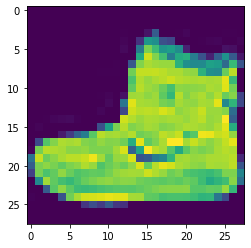

정답: 9


In [30]:
plt.imshow( x_trainF[0] )
plt.show()

print('정답:', y_trainF[0])

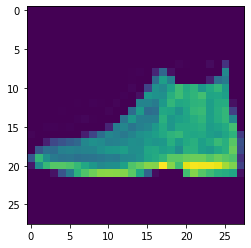

정답: 9


In [31]:
plt.imshow( x_testF[0] )
plt.show()

print('정답:', y_testF[0])

## sklearn 버전

In [63]:
model_mlp_fashion = MLPClassifier( hidden_layer_sizes=(100,), max_iter=1000, verbose=True)
model_mlp_fashion.fit( x_trainF.reshape(-1, 28*28), y_trainF)

Iteration 1, loss = 5.02233306
Iteration 2, loss = 1.10386550
Iteration 3, loss = 0.78817326
Iteration 4, loss = 0.66546872
Iteration 5, loss = 0.60314452
Iteration 6, loss = 0.57067872
Iteration 7, loss = 0.53784621
Iteration 8, loss = 0.51188276
Iteration 9, loss = 0.49168565
Iteration 10, loss = 0.46993838
Iteration 11, loss = 0.44516141
Iteration 12, loss = 0.43395865
Iteration 13, loss = 0.42016049
Iteration 14, loss = 0.40283549
Iteration 15, loss = 0.39639270
Iteration 16, loss = 0.39571136
Iteration 17, loss = 0.38711879
Iteration 18, loss = 0.38435296
Iteration 19, loss = 0.37974314
Iteration 20, loss = 0.37440363
Iteration 21, loss = 0.36944442
Iteration 22, loss = 0.36779043
Iteration 23, loss = 0.36431660
Iteration 24, loss = 0.36386780
Iteration 25, loss = 0.36059463
Iteration 26, loss = 0.35717601
Iteration 27, loss = 0.35175069
Iteration 28, loss = 0.34950420
Iteration 29, loss = 0.34802698
Iteration 30, loss = 0.35330545
Iteration 31, loss = 0.34190771
Iteration 32, los

MLPClassifier(max_iter=1000, verbose=True)

### test 1번째 이미지 예측

In [65]:
model_mlp_fashion.predict(x_testF[0].reshape(-1,28*28))

array([9], dtype=uint8)

In [67]:
y_testF[0]

9

### train, test, 정확도 구하기

In [71]:
(model_mlp_fashion.predict(x_trainF.reshape(-1,28*28)) == y_trainF).mean()

0.8979333333333334

In [72]:
(model_mlp_fashion.predict(x_testF.reshape(-1,28*28)) == y_testF).mean()

0.8482

### confusion matrix

In [75]:
conf_mat_s = confusion_matrix( y_testF, model.predict( x_testF.reshape(-1,28,28) ).argmax(axis=1))
conf_mat_s

array([[779,   4,  12,  59,   3,   5, 131,   0,   7,   0],
       [  2, 965,   1,  17,   8,   0,   4,   0,   3,   0],
       [  8,   1, 750,  16, 129,   0,  82,   0,  14,   0],
       [ 26,   8,   9, 880,  52,   0,  19,   0,   6,   0],
       [  1,   0,  85,  32, 826,   0,  50,   0,   6,   0],
       [  1,   0,   1,   0,   0, 946,   0,  38,   1,  13],
       [115,   2,  88,  44,  94,   0, 646,   0,  11,   0],
       [  0,   0,   0,   0,   0,  15,   0, 961,   2,  22],
       [ 11,   0,  12,   9,   1,   1,   9,   6, 951,   0],
       [  0,   0,   0,   0,   0,   7,   0,  52,   0, 941]], dtype=int64)

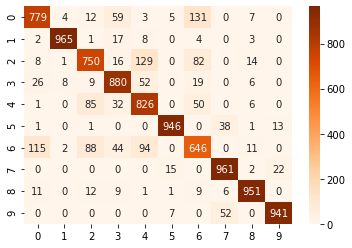

In [76]:
sns.heatmap( conf_mat_s, annot=True, fmt='d', cmap='Oranges')
plt.show()

## keras 버전

In [33]:
print(x_trainF.shape)
print(y_trainF.shape)

(60000, 28, 28)
(60000,)


In [34]:
print(np.unique(y_trainF))
print(len(np.unique(y_trainF)))

[0 1 2 3 4 5 6 7 8 9]
10


In [35]:
model = Sequential()
model.add( Flatten( input_shape=(28,28) )) 
model.add( Dense( units=64, activation='relu' ))
model.add( Dense( units=32, activation='relu' ))
model.add( Dense( units=10, activation='softmax' ))

model.compile( loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])  
model.fit( x_trainF, y_trainF, epochs=200 )

Epoch 1/200
1875/1875 [==============================] - 2s 731us/step - loss: 2.0261 - acc: 0.7106
Epoch 2/200
1875/1875 [==============================] - 1s 733us/step - loss: 0.6507 - acc: 0.7966
Epoch 3/200
1875/1875 [==============================] - 1s 737us/step - loss: 0.5583 - acc: 0.8149
Epoch 4/200
1875/1875 [==============================] - 1s 740us/step - loss: 0.5081 - acc: 0.8292
Epoch 5/200
1875/1875 [==============================] - 1s 739us/step - loss: 0.4703 - acc: 0.8379
Epoch 6/200
1875/1875 [==============================] - 1s 729us/step - loss: 0.4429 - acc: 0.8458
Epoch 7/200
1875/1875 [==============================] - 1s 731us/step - loss: 0.4211 - acc: 0.8519
Epoch 8/200
1875/1875 [==============================] - 1s 732us/step - loss: 0.4129 - acc: 0.8564
Epoch 9/200
1875/1875 [==============================] - 1s 743us/step - loss: 0.4007 - acc: 0.8599
Epoch 10/200
1875/1875 [==============================] - 1s 742us/step - loss: 0.3852 - acc: 0.8645

1875/1875 [==============================] - 1s 752us/step - loss: 0.2292 - acc: 0.9190
Epoch 163/200
1875/1875 [==============================] - 1s 768us/step - loss: 0.2283 - acc: 0.9202
Epoch 164/200
1875/1875 [==============================] - 1s 763us/step - loss: 0.2304 - acc: 0.9201
Epoch 165/200
1875/1875 [==============================] - 1s 751us/step - loss: 0.2254 - acc: 0.9199
Epoch 166/200
1875/1875 [==============================] - 1s 759us/step - loss: 0.2272 - acc: 0.9203
Epoch 167/200
1875/1875 [==============================] - 1s 756us/step - loss: 0.2232 - acc: 0.9215
Epoch 168/200
1875/1875 [==============================] - 1s 765us/step - loss: 0.2350 - acc: 0.9197
Epoch 169/200
1875/1875 [==============================] - 1s 758us/step - loss: 0.2224 - acc: 0.9201
Epoch 170/200
1875/1875 [==============================] - 1s 762us/step - loss: 0.2331 - acc: 0.9190
Epoch 171/200
1875/1875 [==============================] - 1s 768us/step - loss: 0.2361 - acc: 0

### test 1번째 이미지 예측

In [44]:
model.predict( x_testF[0].reshape(1,28,28) ).argmax(axis=1)

array([9], dtype=int64)

In [45]:
y_testF[0]

9

### train, test, 정확도 구하기

In [46]:
model.evaluate( x_trainF, y_trainF)

1875/1875 [==============================] - 1s 571us/step - loss: 0.1971 - acc: 0.9291


[0.19705824553966522, 0.9290833473205566]

In [47]:
model.evaluate( x_testF, y_testF)

313/313 [==============================] - 0s 824us/step - loss: 1.1199 - acc: 0.8645


[1.1198787689208984, 0.8644999861717224]

### confusion matrix

In [73]:
conf_mat_k = confusion_matrix( y_testF, model.predict( x_testF.reshape(-1,28,28) ).argmax(axis=1))
conf_mat_k

array([[779,   4,  12,  59,   3,   5, 131,   0,   7,   0],
       [  2, 965,   1,  17,   8,   0,   4,   0,   3,   0],
       [  8,   1, 750,  16, 129,   0,  82,   0,  14,   0],
       [ 26,   8,   9, 880,  52,   0,  19,   0,   6,   0],
       [  1,   0,  85,  32, 826,   0,  50,   0,   6,   0],
       [  1,   0,   1,   0,   0, 946,   0,  38,   1,  13],
       [115,   2,  88,  44,  94,   0, 646,   0,  11,   0],
       [  0,   0,   0,   0,   0,  15,   0, 961,   2,  22],
       [ 11,   0,  12,   9,   1,   1,   9,   6, 951,   0],
       [  0,   0,   0,   0,   0,   7,   0,  52,   0, 941]], dtype=int64)

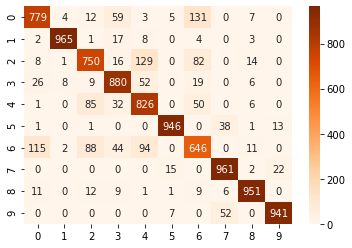

In [74]:
import seaborn as sns

sns.heatmap( conf_mat_k, annot=True, fmt='d', cmap='Oranges')
plt.show()